## Creating the Speed Controller Using the skfuzzy control API

In [1]:
import numpy   as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
# antecedents & consequent
 
x1_labal = 'cover'      ;     x1 = np.arange(0, 100, 1)
x2_labal = 'temperature';     x2 = np.arange(0, 100, 1)

y_label  = 'speed'      ;     y  = np.arange(0, 115, 1)  
y_unit   = 'mph'

In [3]:
# Generate fuzzy membership functions

x1_sunny    = fuzz.trapmf( x1, [  0,  0,  20,  40] )
x1_cloudy   = fuzz.trimf(  x1, [ 20, 50,  80    ] )
x1_overcast = fuzz.trapmf( x1, [ 60, 80, 100, 100] )

x2_freezing = fuzz.trapmf( x2, [ 0,   0,  30,  50] )
x2_cool     = fuzz.trimf(  x2, [ 30, 50,  70     ] )
x2_warm     = fuzz.trimf(  x2, [ 50, 70,  90     ] )
x2_hot      = fuzz.trapmf( x2, [ 70, 90, 100, 100] )

y_slow      = fuzz.trapmf( y,  [  0,  0,  25,  75] )
y_fast      = fuzz.trapmf( y,  [ 25, 75, 115, 115] )

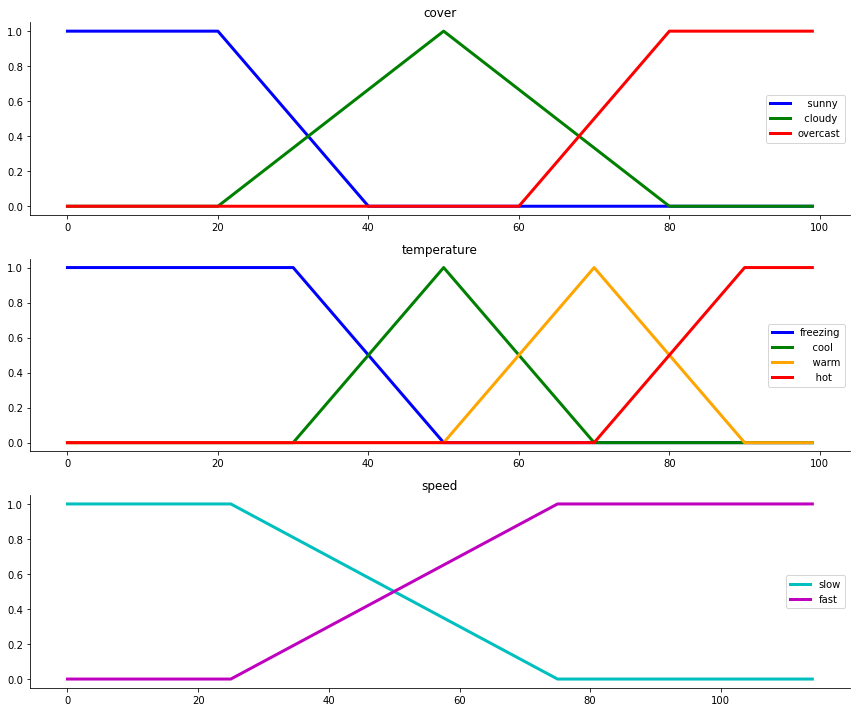

In [4]:
# Visualize these universes and membership functions

fig, ( ax_x1, ax_x2, ax_y ) = plt.subplots( nrows=3, figsize=(12,10) )

ax_x1.plot(  x1, x1_sunny   ,  'b', linewidth=3,  label='   sunny'  )
ax_x1.plot(  x1, x1_cloudy  ,  'g', linewidth=3,  label='  cloudy'  )
ax_x1.plot(  x1, x1_overcast,  'r', linewidth=3,  label='overcast'  )
ax_x1.set_title( x1_labal )
ax_x1.legend()

ax_x2.plot(  x2, x2_freezing,  'blue'  , linewidth=3,  label='freezing'  )
ax_x2.plot(  x2, x2_cool,      'green' , linewidth=3,  label='    cool'  )
ax_x2.plot(  x2, x2_warm,      'orange', linewidth=3,  label='    warm'  )
ax_x2.plot(  x2, x2_hot,       'red'   , linewidth=3,  label='     hot'  )
ax_x2.set_title( x2_labal )
ax_x2.legend() 

ax_y.plot(    y, y_slow, 'c', linewidth=3,  label='slow'  ) 
ax_y.plot(    y, y_fast, 'm', linewidth=3,  label='fast'  )
ax_y.set_title( y_label )
ax_y.legend()  

# Turn off top/right axes
for ax in ( ax_x1, ax_x2, ax_y ):
    ax.spines[ 'top' ].set_visible( False )
    ax.spines['right'].set_visible( False )
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    
plt.tight_layout()
plt.show()

### Crisp Antecedents

In [5]:
# (input)

x1_crisp = 25
x2_crisp = 65

x1_level_sunny    = fuzz.interp_membership( x1, x1_sunny,    x1_crisp )
x1_level_cloudy   = fuzz.interp_membership( x1, x1_cloudy,   x1_crisp )
x1_level_overcast = fuzz.interp_membership( x1, x1_overcast, x1_crisp )

x2_level_freezing = fuzz.interp_membership( x2, x2_freezing, x2_crisp )
x2_level_cool     = fuzz.interp_membership( x2, x2_cool,     x2_crisp )
x2_level_warm     = fuzz.interp_membership( x2, x2_warm,     x2_crisp )
x2_level_hot      = fuzz.interp_membership( x2, x2_hot,      x2_crisp )


## Fuzzy rules

the rules:
1. If it is 'sunny' *And* 'warm', drive 'fast'
2. If it is 'cloudy' *Or* 'cool', drive 'slow' 

Note:
 * c1 | c2  => fmax(c1,c2)
 * c1 & c2 => fmin(c1,c2)

In [6]:
# Rule 1 

active_rule1      = np.fmin( x1_level_sunny, x2_level_warm )
y_activation_fast = np.fmin( active_rule1, y_fast )


In [7]:
# Rule 2  

active_rule2      = np.fmax( x1_level_cloudy, x2_level_cool )
y_activation_slow = np.fmin( active_rule2, y_slow )


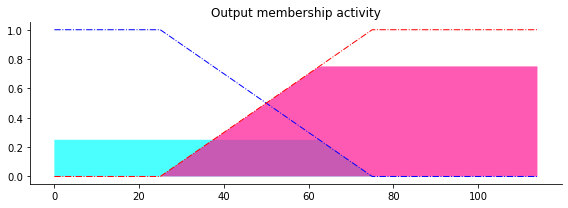

In [8]:
# Visualize this
fig, ax = plt.subplots( figsize=(8, 3) )
y0      = np.zeros_like( y )

ax.fill_between( y, y0, y_activation_slow, facecolor='cyan',     alpha=0.7 ) 
ax.fill_between( y, y0, y_activation_fast, facecolor='deeppink', alpha=0.7 )

ax.plot( y, y_slow, 'b', linewidth=1.0, linestyle='-.' ) 
ax.plot( y, y_fast, 'r', linewidth=1.0, linestyle='-.' )

ax.set_title( 'Output membership activity' )

# Turn off top/right axes
ax.spines[ 'top' ].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

## Rule aggregation
With the activity of each output membership function known, all output
membership functions must
be combined. This is typically done using a
maximum operator. This step is also known as
aggregation.

In [9]:
# Aggregate all three output membership functions together
aggregated = np.fmax( y_activation_slow
                    , np.fmax( y_activation_fast
                             , y_activation_fast ))

## Defuzzification
Finally, to get a real world answer, we return to crisp logic from the
world of fuzzy membership
functions. For the purposes of this example
the centroid method will be used.
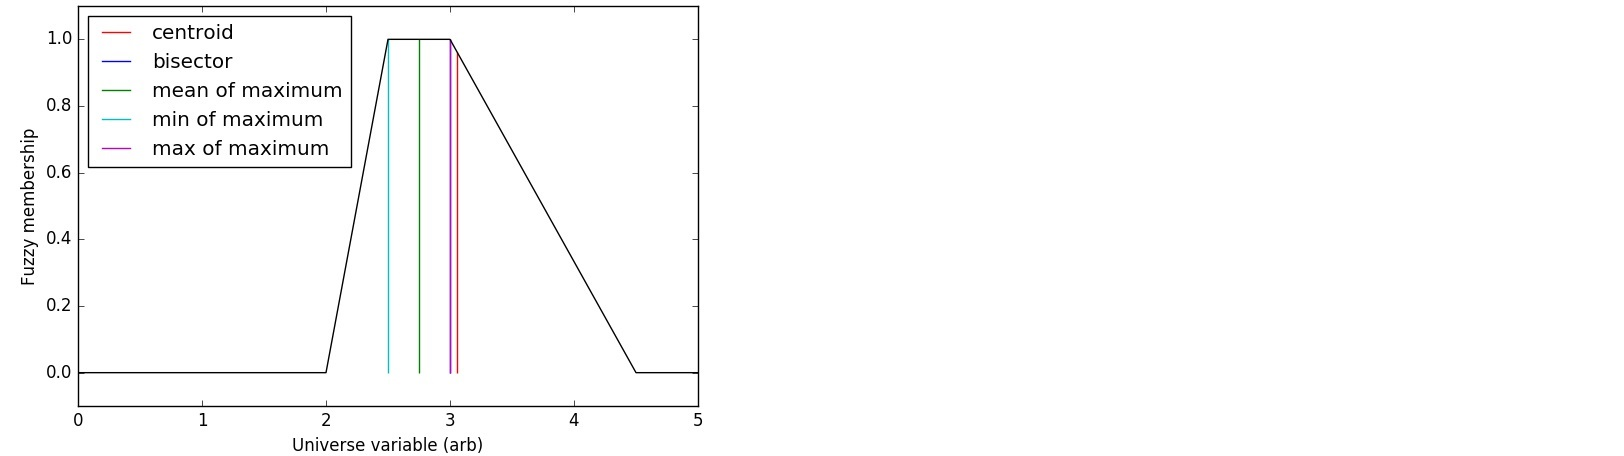

In [15]:
# Calculate defuzzified result

defuzz  = 'centroid'  # 'centroid' 'bisector' 'mom' 'som' 'lom'
y_crisp = fuzz.defuzz( y, aggregated, defuzz )

print( y_label + ' = ' + str(  np.round(y_crisp,2)) + ' ' + y_unit ) 

speed = 70.01 mph


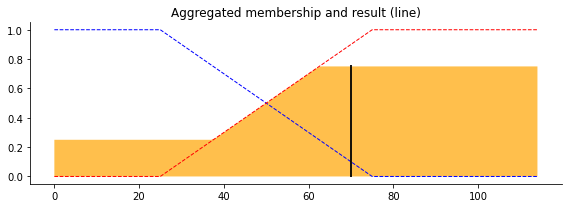

In [17]:
# Visualize this

fig, ax      = plt.subplots(figsize=(8, 3))
y_activation = fuzz.interp_membership( y, aggregated, y_crisp ) # for plot

ax.plot( y, y_slow, 'b', linewidth=1.0, linestyle='--' ) 
ax.plot( y, y_fast, 'r', linewidth=1.0, linestyle='--' )

ax.fill_between( y, y0, aggregated, facecolor='Orange', alpha=0.7 )
ax.plot( [y_crisp, y_crisp], [0, y_activation], 'k', linewidth=2.0, alpha=0.9 )

ax.set_title('Aggregated membership and result (line)')

# Turn off top/right axes 
ax.spines[ 'top' ].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

## 